In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
file_path  = r"C:\Users\Ravichandran\OneDrive\Desktop\cleaned_crime_dataset.csv999"
bike_data = pd.read_csv(file_path)
df_original = bike_data.copy() # for prevent data if any crashes

In [3]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,39F966CA536E3338,classic_bike,2025-06-13 08:38:24.306,2025-06-13 09:55:40.519,River Rd & Landy Ln,32046.0,34th & Water St NW,31314.0,38.964992,-77.103381,38.903731,-77.067528,casual
1,E6C2B8A40F8930CB,classic_bike,2025-06-03 15:10:16.164,2025-06-03 15:27:22.184,21st & I St NW,31205.0,15th & W St NW,31125.0,38.900711,-77.046449,38.919018,-77.034449,casual
2,126C754C11822591,classic_bike,2025-06-16 08:48:53.288,2025-06-16 08:59:53.758,13th & U St NW,31132.0,14th & G St NW,31238.0,38.916936,-77.029631,38.898164,-77.031898,casual
3,F8AB2D4F34478744,classic_bike,2025-06-09 20:09:07.186,2025-06-09 20:53:17.709,13th & U St NW,31132.0,Independence Ave & L'Enfant Plaza SW/DOE,31633.0,38.916936,-77.029631,38.887332,-77.026141,casual
4,3DB3D45DC42EBEA9,electric_bike,2025-06-25 22:03:21.608,2025-06-25 22:11:31.477,Virginia Hospital Center,31976.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.887914,-77.128015,38.882788,-77.103148,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355814,394DE2C0FAC755E7,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,16th St & North Carolina Ave NE,31725.0,NaN,NaN,38.893068,-76.982507,38.890000,-77.020000,member
1355815,8B17985AE49F66E1,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.890000,-77.110000,member
1355816,61E5BE18E664C945,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.890000,-77.110000,member
1355817,F275A9CAD7155111,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,Chillum Rd & Riggs Rd / Riggs Plaza,32416.0,NaN,NaN,38.961746,-76.995908,38.950000,-77.000000,member


In [4]:
bike_data.info()
bike_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355819 entries, 0 to 1355818
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1355819 non-null  object 
 1   rideable_type       1355819 non-null  object 
 2   started_at          1355819 non-null  object 
 3   ended_at            1355819 non-null  object 
 4   start_station_name  975058 non-null   object 
 5   start_station_id    975058 non-null   float64
 6   end_station_name    965723 non-null   object 
 7   end_station_id      965502 non-null   float64
 8   start_lat           1355819 non-null  float64
 9   start_lng           1355819 non-null  float64
 10  end_lat             1354795 non-null  float64
 11  end_lng             1354795 non-null  float64
 12  member_casual       1355819 non-null  object 
dtypes: float64(6), object(7)
memory usage: 134.5+ MB


(1355819, 13)

In [5]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,39F966CA536E3338,classic_bike,2025-06-13 08:38:24.306,2025-06-13 09:55:40.519,River Rd & Landy Ln,32046.0,34th & Water St NW,31314.0,38.964992,-77.103381,38.903731,-77.067528,casual
1,E6C2B8A40F8930CB,classic_bike,2025-06-03 15:10:16.164,2025-06-03 15:27:22.184,21st & I St NW,31205.0,15th & W St NW,31125.0,38.900711,-77.046449,38.919018,-77.034449,casual
2,126C754C11822591,classic_bike,2025-06-16 08:48:53.288,2025-06-16 08:59:53.758,13th & U St NW,31132.0,14th & G St NW,31238.0,38.916936,-77.029631,38.898164,-77.031898,casual
3,F8AB2D4F34478744,classic_bike,2025-06-09 20:09:07.186,2025-06-09 20:53:17.709,13th & U St NW,31132.0,Independence Ave & L'Enfant Plaza SW/DOE,31633.0,38.916936,-77.029631,38.887332,-77.026141,casual
4,3DB3D45DC42EBEA9,electric_bike,2025-06-25 22:03:21.608,2025-06-25 22:11:31.477,Virginia Hospital Center,31976.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.887914,-77.128015,38.882788,-77.103148,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355814,394DE2C0FAC755E7,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,16th St & North Carolina Ave NE,31725.0,NaN,NaN,38.893068,-76.982507,38.890000,-77.020000,member
1355815,8B17985AE49F66E1,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.890000,-77.110000,member
1355816,61E5BE18E664C945,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.890000,-77.110000,member
1355817,F275A9CAD7155111,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,Chillum Rd & Riggs Rd / Riggs Plaza,32416.0,NaN,NaN,38.961746,-76.995908,38.950000,-77.000000,member


In [6]:
bike_data.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,975058.000000,965502.000000,1.355819e+06,1.355819e+06,1.354795e+06,1.354795e+06
mean,31393.105980,31394.241293,3.890577e+01,-7.703335e+01,3.890519e+01,-7.703313e+01
std,306.120836,306.671423,3.222860e-02,3.935355e-02,3.222348e-02,3.935111e-02
min,30200.000000,30200.000000,3.876000e+01,-7.738970e+01,3.871000e+01,-7.739000e+01
25%,31210.000000,31213.000000,3.889040e+01,-7.704645e+01,3.889000e+01,-7.704645e+01
50%,31293.000000,31291.000000,3.890551e+01,-7.703000e+01,3.890507e+01,-7.703000e+01
75%,31615.000000,31615.000000,3.892000e+01,-7.701055e+01,3.892000e+01,-7.701000e+01
max,33200.000000,33200.000000,3.913000e+01,-7.681000e+01,3.918000e+01,-7.648000e+01


In [7]:
bike_data.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [8]:
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    380761
start_station_id      380761
end_station_name      390096
end_station_id        390317
start_lat                  0
start_lng                  0
end_lat                 1024
end_lng                 1024
member_casual              0
dtype: int64

In [9]:
bike_data.drop(['start_station_name','start_station_id','end_station_name','end_station_id','ride_id'], axis=1, inplace=True)

In [10]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2025-06-13 08:38:24.306,2025-06-13 09:55:40.519,38.964992,-77.103381,38.903731,-77.067528,casual
1,classic_bike,2025-06-03 15:10:16.164,2025-06-03 15:27:22.184,38.900711,-77.046449,38.919018,-77.034449,casual
2,classic_bike,2025-06-16 08:48:53.288,2025-06-16 08:59:53.758,38.916936,-77.029631,38.898164,-77.031898,casual
3,classic_bike,2025-06-09 20:09:07.186,2025-06-09 20:53:17.709,38.916936,-77.029631,38.887332,-77.026141,casual
4,electric_bike,2025-06-25 22:03:21.608,2025-06-25 22:11:31.477,38.887914,-77.128015,38.882788,-77.103148,member
...,...,...,...,...,...,...,...,...
1355814,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.890000,-77.020000,member
1355815,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.890000,-77.110000,member
1355816,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.890000,-77.110000,member
1355817,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.950000,-77.000000,member


In [11]:
bike_data['end_lat'] = bike_data['end_lat'].fillna(bike_data['end_lat'].median()) # median gives realistic coordinates that won't break analysis
bike_data['end_lng'] = bike_data['end_lng'].fillna(bike_data['end_lng'].median())

In [12]:
bike_data['end_lng'].isnull()
bike_data['end_lat'].isnull() # checking results

0          False
1          False
2          False
3          False
4          False
           ...  
1355814    False
1355815    False
1355816    False
1355817    False
1355818    False
Name: end_lat, Length: 1355819, dtype: bool

In [13]:
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') #converting string to datetime format.
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [14]:
bike_data['journey_duration'] = (bike_data['ended_at'] - bike_data['started_at']).dt.total_seconds() / 60 # Calculate trip duration 

In [15]:
y = bike_data['journey_duration'] # testing ist its working or not ##-> for traning
print(y[:10])

0    77.270217
1    17.100333
2    11.007833
3    44.175383
4     8.164483
5    34.829200
6     6.880783
7     3.131900
8     7.616433
9     3.841183
Name: journey_duration, dtype: float64


In [16]:
#### Converting datetime for start_at
bike_data['start_Day'] = pd.to_datetime(bike_data['started_at']).dt.day        # Day number (1-31)
bike_data['start_Month'] = pd.to_datetime(bike_data['started_at']).dt.month    # Month number (1-12)
bike_data['start_Hour'] = pd.to_datetime(bike_data['started_at']).dt.hour      # Hour (0-23) 
bike_data['start_Weekday'] = pd.to_datetime(bike_data['started_at']).dt.weekday # Weekday (0-6) 

#### Converting datetime for ended_at  
bike_data['ended_Day'] = pd.to_datetime(bike_data['ended_at']).dt.day
bike_data['ended_Month'] = pd.to_datetime(bike_data['ended_at']).dt.month
bike_data['ended_Hour'] = pd.to_datetime(bike_data['ended_at']).dt.hour        
bike_data['ended_Weekday'] = pd.to_datetime(bike_data['ended_at']).dt.weekday  

In [17]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,journey_duration,start_Day,start_Month,start_Hour,start_Weekday,ended_Day,ended_Month,ended_Hour,ended_Weekday
0,classic_bike,2025-06-13 08:38:24.306,2025-06-13 09:55:40.519,38.964992,-77.103381,38.903731,-77.067528,casual,77.270217,13,6,8,4,13,6,9,4
1,classic_bike,2025-06-03 15:10:16.164,2025-06-03 15:27:22.184,38.900711,-77.046449,38.919018,-77.034449,casual,17.100333,3,6,15,1,3,6,15,1
2,classic_bike,2025-06-16 08:48:53.288,2025-06-16 08:59:53.758,38.916936,-77.029631,38.898164,-77.031898,casual,11.007833,16,6,8,0,16,6,8,0
3,classic_bike,2025-06-09 20:09:07.186,2025-06-09 20:53:17.709,38.916936,-77.029631,38.887332,-77.026141,casual,44.175383,9,6,20,0,9,6,20,0
4,electric_bike,2025-06-25 22:03:21.608,2025-06-25 22:11:31.477,38.887914,-77.128015,38.882788,-77.103148,member,8.164483,25,6,22,2,25,6,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355814,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.890000,-77.020000,member,12.306883,1,4,8,1,1,4,8,1
1355815,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.890000,-77.110000,member,8.060150,1,4,8,1,1,4,8,1
1355816,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.890000,-77.110000,member,9.329200,9,4,8,2,9,4,8,2
1355817,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.950000,-77.000000,member,5.721500,20,4,10,6,20,4,10,6


In [18]:
bike_data.drop(['started_at'], axis=1, inplace=True) # after extracting datetime remove exsisting datetime column
bike_data.drop(['ended_at'], axis=1, inplace=True)
# removing other unwanted columns
bike_data.drop(['rideable_type'], axis=1 , inplace=True) 
bike_data.drop(['member_casual'], axis=1, inplace=True)

In [19]:
bike_data

,start_lat,start_lng,end_lat,end_lng,journey_duration,start_Day,start_Month,start_Hour,start_Weekday,ended_Day,ended_Month,ended_Hour,ended_Weekday
0,38.964992,-77.103381,38.903731,-77.067528,77.270217,13,6,8,4,13,6,9,4
1,38.900711,-77.046449,38.919018,-77.034449,17.100333,3,6,15,1,3,6,15,1
2,38.916936,-77.029631,38.898164,-77.031898,11.007833,16,6,8,0,16,6,8,0
3,38.916936,-77.029631,38.887332,-77.026141,44.175383,9,6,20,0,9,6,20,0
4,38.887914,-77.128015,38.882788,-77.103148,8.164483,25,6,22,2,25,6,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355814,38.893068,-76.982507,38.890000,-77.020000,12.306883,1,4,8,1,1,4,8,1
1355815,38.869442,-77.104503,38.890000,-77.110000,8.060150,1,4,8,1,1,4,8,1
1355816,38.869442,-77.104503,38.890000,-77.110000,9.329200,9,4,8,2,9,4,8,2
1355817,38.961746,-76.995908,38.950000,-77.000000,5.721500,20,4,10,6,20,4,10,6


In [20]:
bike_data.isnull().sum()

start_lat           0
start_lng           0
end_lat             0
end_lng             0
journey_duration    0
start_Day           0
start_Month         0
start_Hour          0
start_Weekday       0
ended_Day           0
ended_Month         0
ended_Hour          0
ended_Weekday       0
dtype: int64

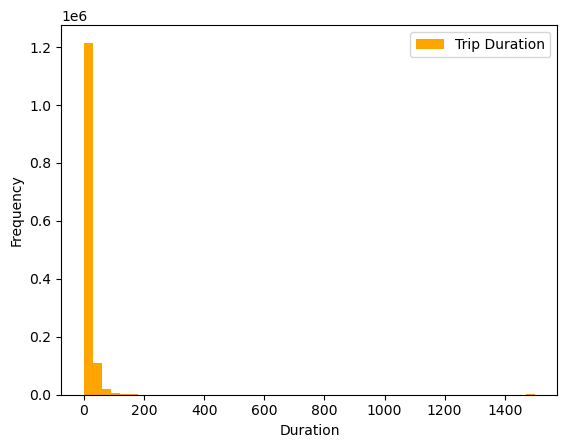

In [21]:
%matplotlib inline
label = 'journey_duration'
plt.hist(bike_data[label] , bins=50, color='orange', label='Trip Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


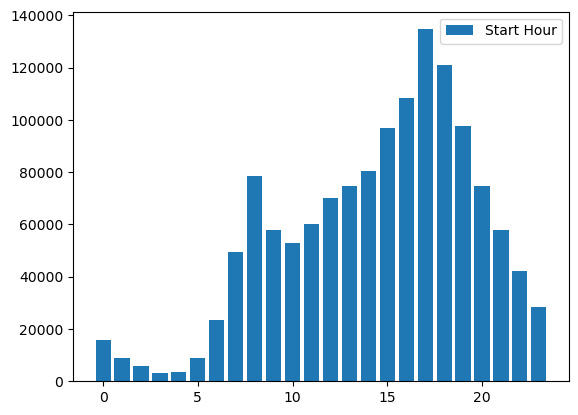

In [22]:
plt.bar(bike_data['start_Hour'].value_counts().index, bike_data['start_Hour'].value_counts().values, label='Start Hour') # Trip duration day/ hour
plt.legend()
plt.show()

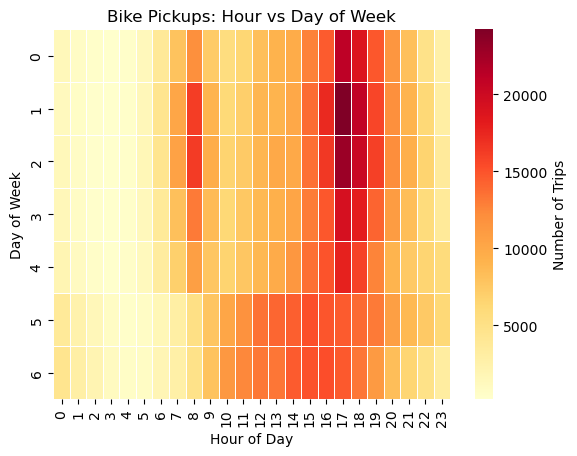

In [23]:
## showing patterns in pickup/drop-off times
heatmap_data = bike_data.groupby(['start_Weekday', 'start_Hour']).size().unstack(fill_value=0) #  if values null->  fill_value=0 # unstack converts 2D array like satrt_week,start_Hour(Monday, 8AM)
plt.Figure(figsize=(15,8)) # figure size
sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', fmt='d',linewidths=0.5, cbar_kws={'label': 'Number of Trips'}) # ploting and hows nuber inside each cell
plt.title('Bike Pickups: Hour vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

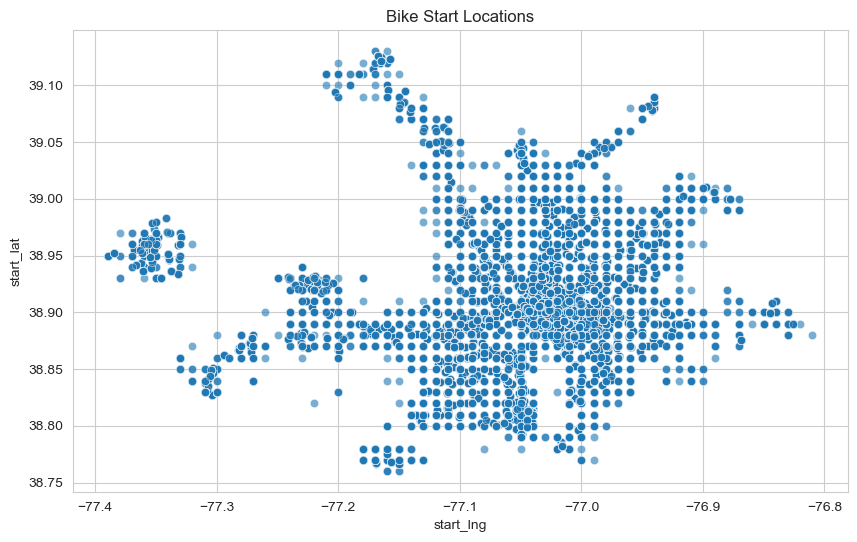

In [24]:

# Seaborn makes things automatically prettier
sns.set_style("whitegrid")  # Clean background
plt.figure(figsize=(10, 6))
sns.scatterplot(data = bike_data, x='start_lng', y='start_lat', alpha=0.6)
plt.title('Bike Start Locations')
plt.show()


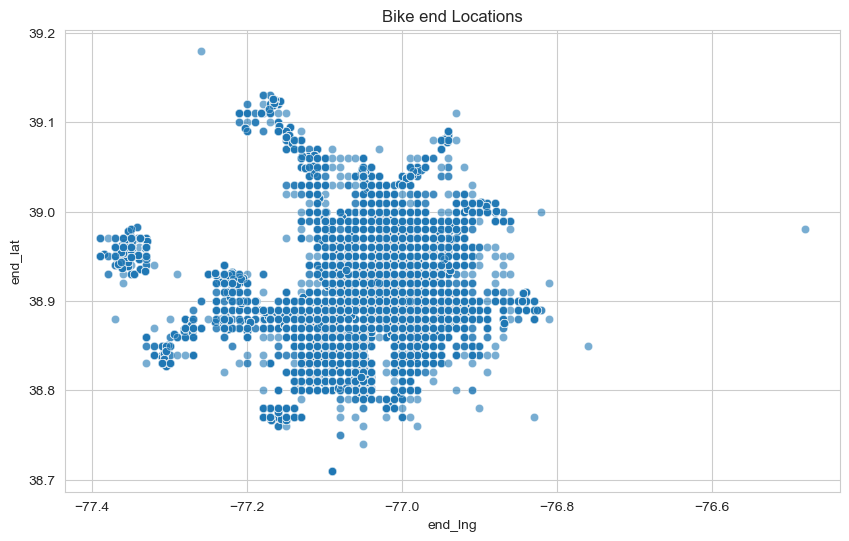

In [25]:
sns.set_style("whitegrid")  # Clean background
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_data, x='end_lng', y='end_lat', alpha=0.6)
plt.title('Bike end Locations')
plt.show()


In [26]:
# Separate features and labels # using 2D [[]] for Ml traing even if one future
X, y = bike_data[['start_lat',	'start_lng',	'end_lat',	'end_lng',		'start_Day',	'start_Month',	'start_Hour',	'start_Weekday',	'ended_Day',	'ended_Month',	'ended_Hour',	'ended_Weekday']].values, bike_data['journey_duration'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 38.964992   -77.103381    38.9037315  -77.0675285   13.
    6.           8.           4.          13.           6.
    9.           4.        ]
 [ 38.90071063 -77.04644859  38.9190185  -77.034449     3.
    6.          15.           1.           3.           6.
   15.           1.        ]
 [ 38.91693645 -77.02963114  38.89816396 -77.0318976   16.
    6.           8.           0.          16.           6.
    8.           0.        ]
 [ 38.91693645 -77.02963114  38.887332   -77.026141     9.
    6.          20.           0.           9.           6.
   20.           0.        ]
 [ 38.88791377 -77.12801456  38.882788   -77.103148    25.
    6.          22.           2.          25.           6.
   22.           2.        ]
 [ 38.86331354 -77.06341624  38.87887    -77.1207       4.
    6.          18.           2.           4.           6.
   18.           2.        ]
 [ 38.882489   -76.990121    38.897274   -76.994749     7.
    6.          15.           5.           7.    

In [27]:
print(bike_data.dtypes)

start_lat           float64
start_lng           float64
end_lat             float64
end_lng             float64
journey_duration    float64
start_Day             int32
start_Month           int32
start_Hour            int32
start_Weekday         int32
ended_Day             int32
ended_Month           int32
ended_Hour            int32
ended_Weekday         int32
dtype: object


In [28]:

#  split Train and test data sets
from sklearn.model_selection import train_test_split

# Split data 90%-10% into training set and test set  becouse we have more data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 949073 rows
Test Set: 406746 rows


In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_test, y_test)
print(model)


RandomForestRegressor()


In [30]:
predict = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predict)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [12. 10.  5.  5. 12. 29.  7. 10. 28. 16.]
Actual labels   :  [11.46485     7.28586667  3.2252      3.39518333 12.499      38.95581667
  6.77751667 17.20205    28.15231667 16.25191667]


In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predict))
print("MAE:", mean_absolute_error(y_test, predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predict)))

R²: 0.9679469600760217
MAE: 2.631340435746332
RMSE: 9.228089981137188


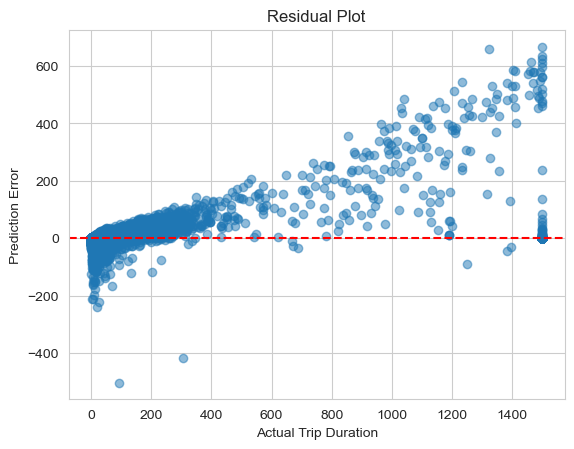

In [32]:
residuals = y_test - predict
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Trip Duration")
plt.ylabel("Prediction Error")
plt.title("Residual Plot")
plt.show()